# LABELING

In [ ]:
import pandas as pd

# Membaca data dari file CSV dengan menyertakan parameter delimiter
df = pd.read_excel('/content/dataset.xlsx')

df

,Unnamed: 0,Title,Teks Berita,Label
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
...,...,...,...,...
1497,296,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",KOMPAS.com - Gubernur Jawa Barat Ridwan Kamil ...,0
1498,297,Elite Politik Selandia Baru Yakin PM Ardern Mu...,"WELLINGTON, KOMPAS.com - Perdana Menteri Selan...",0
1499,298,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",Ketua DPD Partai Golkar Jawa Barat Ace Hasan S...,0
1500,299,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,"JAKARTA, KOMPAS.com ï¿½ Komisi Pemilihan Umum ...",0


In [ ]:
data = df.drop(columns=['Unnamed: 0', 'Teks Berita'])
data

,Title,Label
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1
...,...,...
1497,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",0
1498,Elite Politik Selandia Baru Yakin PM Ardern Mu...,0
1499,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",0
1500,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,0


In [ ]:
data = data.drop_duplicates(subset=['Title'])
data['Title'] = data['Title'].str.replace('\[SALAH\]', '')
data

<ipython-input-12-eb0b4c196a57>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Title'] = data['Title'].str.replace('\[SALAH\]', '')
<ipython-input-12-eb0b4c196a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].str.replace('\[SALAH\]', '')


,Title,Label
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1
...,...,...
1497,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",0
1498,Elite Politik Selandia Baru Yakin PM Ardern Mu...,0
1499,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",0
1500,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,0


# Sentiment Analysis Using Naive Bayes

## Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle
import re
import seaborn as sn

%matplotlib inline

In [ ]:
!pip -q install sastrawi

In [ ]:
data["Label"].value_counts()

1    1200
0     297
Name: Label, dtype: int64

### Casefolding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ""  # Return an empty string or some other placeholder for non-string inputs
    text = re.sub(r'\n', ' ', text)                      # Menghilangkan Enter
    text = text.lower()                                  # Mengubah huruf menjadi huruf kecil
    text = text.replace("[SALAH]", " ")                  # Hapus [SALAH]
    text = text.replace(":", " ")                        # Hapus :
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)   # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', ' ', text)             # Menghapus angka
    text = re.sub(r'[^\w\s*]',' ', text)                 # Menghapus karakter tanda baca
    text = text.strip()                                  # Menghapus whitespace di awal dan di akhir
    return text

data["casefolding"] = data["Title"].apply(lambda x: casefolding(x))
data.head(15)

<ipython-input-16-4a86489744bf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["casefolding"] = data["Title"].apply(lambda x: casefolding(x))


,Title,Label,casefolding
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1,anies baswedan dekat dengan aliran krsiten ses...
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1,hakim wahyu iman santoso alami kecelakaan tung...
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,gambar megawati dan puan bermain slot
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1,jonathan latumahina seorang nasrani dan penyus...
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1,pesan whatsapp dari bmkg yang kabarkan gunung ...
5,"PDI-P Diblacklist dari Peserta Pilpres, Tak B...",1,pdi p diblacklist dari peserta pilpres tak bi...
6,Ari Lasso Meninggal Dunia Akibat Mengidap Pen...,1,ari lasso meninggal dunia akibat mengidap peny...
7,Richard Eliezer Hadiri Pemakaman Ferdy Sambo,1,richard eliezer hadiri pemakaman ferdy sambo
8,Foto Presiden Joe Biden dan Volodymyr Zelensk...,1,foto presiden joe biden dan volodymyr zelensky...
9,Video Salju Turun Pertama Kali Dalam 100 Tahu...,1,video salju turun pertama kali dalam tahun d...


In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

data["tokenization"] = data["casefolding"].apply(lambda x: tokenize(x))
data.head(15)

<ipython-input-17-3eaeca93f957>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tokenization"] = data["casefolding"].apply(lambda x: tokenize(x))


,Title,Label,casefolding,tokenization
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1,anies baswedan dekat dengan aliran krsiten ses...,"[anies, baswedan, dekat, dengan, aliran, krsit..."
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1,hakim wahyu iman santoso alami kecelakaan tung...,"[hakim, wahyu, iman, santoso, alami, kecelakaa..."
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,gambar megawati dan puan bermain slot,"[gambar, megawati, dan, puan, bermain, slot]"
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1,jonathan latumahina seorang nasrani dan penyus...,"[jonathan, latumahina, seorang, nasrani, dan, ..."
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1,pesan whatsapp dari bmkg yang kabarkan gunung ...,"[pesan, whatsapp, dari, bmkg, yang, kabarkan, ..."
5,"PDI-P Diblacklist dari Peserta Pilpres, Tak B...",1,pdi p diblacklist dari peserta pilpres tak bi...,"[pdi, p, diblacklist, dari, peserta, pilpres, ..."
6,Ari Lasso Meninggal Dunia Akibat Mengidap Pen...,1,ari lasso meninggal dunia akibat mengidap peny...,"[ari, lasso, meninggal, dunia, akibat, mengida..."
7,Richard Eliezer Hadiri Pemakaman Ferdy Sambo,1,richard eliezer hadiri pemakaman ferdy sambo,"[richard, eliezer, hadiri, pemakaman, ferdy, s..."
8,Foto Presiden Joe Biden dan Volodymyr Zelensk...,1,foto presiden joe biden dan volodymyr zelensky...,"[foto, presiden, joe, biden, dan, volodymyr, z..."
9,Video Salju Turun Pertama Kali Dalam 100 Tahu...,1,video salju turun pertama kali dalam tahun d...,"[video, salju, turun, pertama, kali, dalam, ta..."


### Normalisasi kata

normalisasi kata, datanya dapat di download disini
https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

In [ ]:
key_norm = pd.read_csv("/content/key_norm.csv")
def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text
data['textnormalize'] = data['casefolding'].apply(text_normalize)
data.head()


,Title,Label,casefolding,textnormalize
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1,anies baswedan dekat dengan aliran krsiten ses...,anies baswedan dekat dengan aliran krsiten ses...
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1,hakim wahyu iman santoso alami kecelakaan tung...,hakim wahyu iman santoso alami kecelakaan tung...
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,gambar megawati dan puan bermain slot,gambar megawati dan puan bermain slot
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1,jonathan latumahina seorang nasrani dan penyus...,jonathan latumahina seorang nasrani dan penyus...
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1,pesan whatsapp dari bmkg yang kabarkan gunung ...,pesan whatsapp dari bmkg yang kabarkan gunung ...


### Stopwords Removal

In [ ]:
# download Stopwords bahasa indonesia
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


stopwords_ind = stopwords.words('indonesian')
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)
data['stopwordremoval'] = data['textnormalize'].apply(remove_stop_words)
data.head()

,Title,Label,casefolding,textnormalize,stopwordremoval
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1,anies baswedan dekat dengan aliran krsiten ses...,anies baswedan dekat dengan aliran krsiten ses...,anies baswedan aliran krsiten sesat alpha omeg...
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1,hakim wahyu iman santoso alami kecelakaan tung...,hakim wahyu iman santoso alami kecelakaan tung...,hakim wahyu iman santoso alami kecelakaan tung...
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,gambar megawati dan puan bermain slot,gambar megawati dan puan bermain slot,gambar megawati puan bermain slot
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1,jonathan latumahina seorang nasrani dan penyus...,jonathan latumahina seorang nasrani dan penyus...,jonathan latumahina nasrani penyusup ormas islam
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1,pesan whatsapp dari bmkg yang kabarkan gunung ...,pesan whatsapp dari bmkg yang kabarkan gunung ...,pesan whatsapp bmkg kabarkan gunung sinabung m...


### Stemming

stemmming adalah menghilangkan kata depan dan kata belakang contohnya

Menghidupkan -> hidup

Module yang digunakan untuk bahasa indonesia adalah Sastrawi

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text
data['stemming'] = data['stopwordremoval'].apply(stemming)
data.head()

,Title,Label,casefolding,textnormalize,stopwordremoval,stemming
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1,anies baswedan dekat dengan aliran krsiten ses...,anies baswedan dekat dengan aliran krsiten ses...,anies baswedan aliran krsiten sesat alpha omeg...,anies baswedan alir krsiten sesat alpha omega ...
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1,hakim wahyu iman santoso alami kecelakaan tung...,hakim wahyu iman santoso alami kecelakaan tung...,hakim wahyu iman santoso alami kecelakaan tung...,hakim wahyu iman santoso alami celaka tunggal ...
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,gambar megawati dan puan bermain slot,gambar megawati dan puan bermain slot,gambar megawati puan bermain slot,gambar megawati puan main slot
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1,jonathan latumahina seorang nasrani dan penyus...,jonathan latumahina seorang nasrani dan penyus...,jonathan latumahina nasrani penyusup ormas islam,jonathan latumahina nasrani susup ormas islam
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1,pesan whatsapp dari bmkg yang kabarkan gunung ...,pesan whatsapp dari bmkg yang kabarkan gunung ...,pesan whatsapp bmkg kabarkan gunung sinabung m...,pesan whatsapp bmkg kabar gunung sabung letus


In [ ]:
data["clean_text"] = data['stemming']
data.drop(["casefolding","textnormalize","stopwordremoval","stemming"],axis=1,inplace=True)
data.head()

,Title,Label,clean_text
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1,anies baswedan alir krsiten sesat alpha omega ...
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1,hakim wahyu iman santoso alami celaka tunggal ...
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,gambar megawati puan main slot
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1,jonathan latumahina nasrani susup ormas islam
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1,pesan whatsapp bmkg kabar gunung sabung letus


### Hapus clean text yang kosong

In [ ]:
data = data[data["clean_text"]!=""]
data

,Title,Label,clean_text
0,Anies Baswedan Dekat Dengan Aliran Krsiten Se...,1,anies baswedan alir krsiten sesat alpha omega ...
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...,1,hakim wahyu iman santoso alami celaka tunggal ...
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,gambar megawati puan main slot
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...,1,jonathan latumahina nasrani susup ormas islam
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...,1,pesan whatsapp bmkg kabar gunung sabung letus
...,...,...,...
1497,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",0,langkah politik gabung golkar ridwan kamil jaw...
1498,Elite Politik Selandia Baru Yakin PM Ardern Mu...,0,elite politik selandia pm ardern mundur ancam ...
1499,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",0,anut politik ridwan kamil nilai maju cawapres
1500,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,0,kpu aku politik uang pr milu ungkit fenomena k...


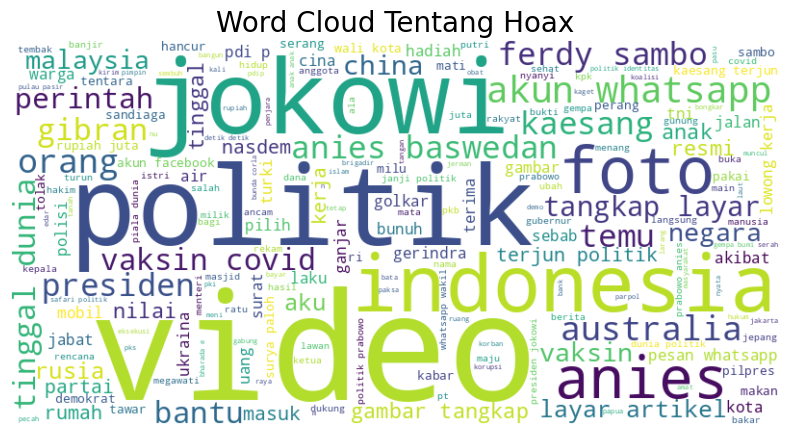

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(data['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Tentang Hoax', fontsize=20)  # Memberikan label 'Word Cloud Tentang Hoax'
plt.show()


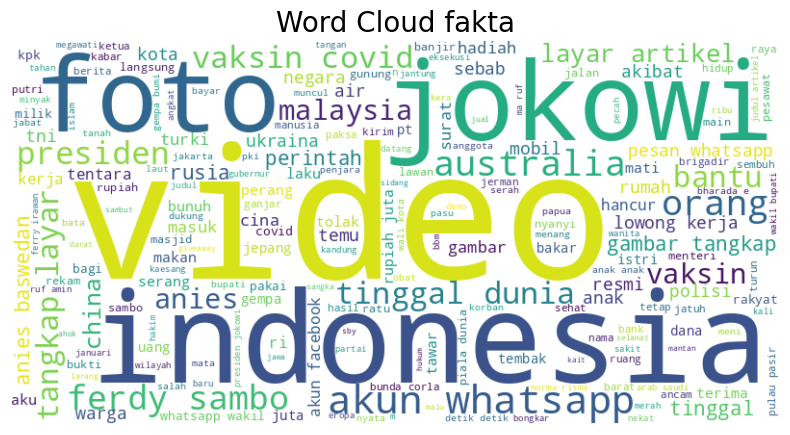

In [ ]:
fakta = data[data['Label'] == 1]

# Menggabungkan teks dari data yang sudah difilter
all_text = ' '.join(fakta['clean_text'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud fakta', fontsize=20)
plt.show()

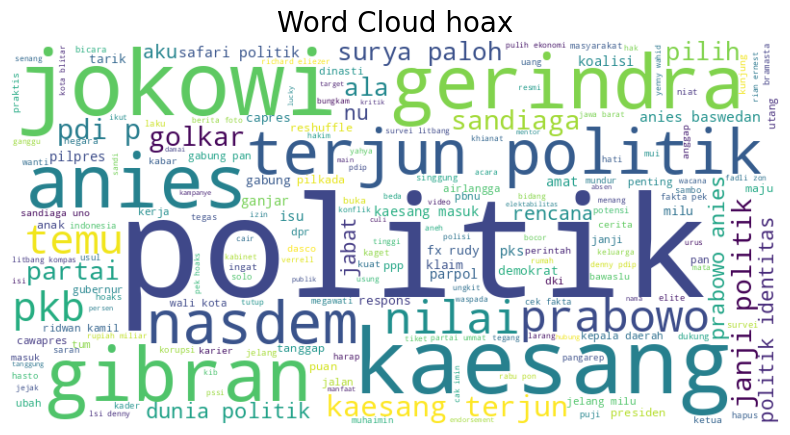

In [ ]:
hoax = data[data['Label'] == 0]

# Menggabungkan teks dari data yang sudah difilter
all_text = ' '.join(hoax['clean_text'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud hoax', fontsize=20)
plt.show()

In [ ]:
data.to_excel('dataset_clean.xlsx')

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X_raw = data["clean_text"]
y_raw = data["Label"]
X_train, X_test, y_train, y_test = train_test_split(X_raw.values, y_raw.values, test_size=0.4, random_state=42)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
X_train_TFIDF = vectorizer.transform(X_train).toarray()
X_test_TFIDF = vectorizer.transform(X_test).toarray()
X = vectorizer.transform(data["clean_text"]).toarray()
kolom = vectorizer.get_feature_names_out()
train_tf_idf = pd.DataFrame(X_train_TFIDF, columns=kolom)
test_tf_idf = pd.DataFrame(X_test_TFIDF, columns=kolom)
train_tf_idf.head()

,abad,abad nu,abad sebab,abad tengah,abang,abbas,abdallah,abdallah shalat,abdi,abdi setan,...,zon buka,zon sufmi,zon sumfi,zuckerberg,zuckerberg friendly,zul,zul elfian,zul solok,zulkifli,zulkifli hasan
0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.241487,0.26758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=500)
X_kbest_features = chi2_features.fit_transform(train_tf_idf, y_train)

print('Banyaknya fitur awal:', train_tf_idf.shape[1])
print('banyaknya fitur setelah di seleksi:', X_kbest_features.shape[1])


Banyaknya fitur awal: 7519
banyaknya fitur setelah di seleksi: 500


In [ ]:
X_kbest_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18950559, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_kbest_features,y_train)

GaussianNB()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      0.93      0.79       122
           1       0.98      0.90      0.94       477

    accuracy                           0.90       599
   macro avg       0.84      0.91      0.86       599
weighted avg       0.92      0.90      0.91       599



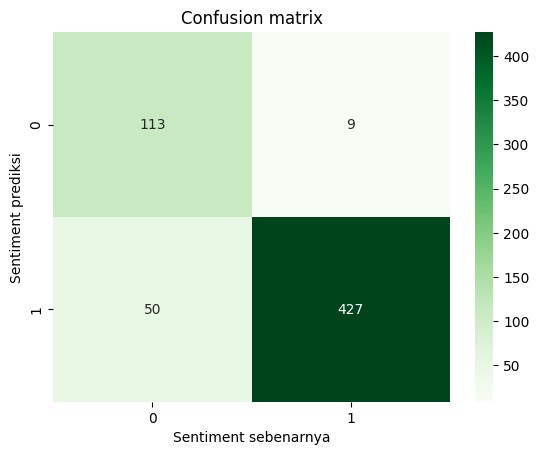

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

X_test_chi2 = chi2_features.transform(X_test_TFIDF)
y_pred = NB.predict(X_test_chi2)
print(classification_report(y_test, y_pred))

columns = ['0', '1']
confm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt=".0f")
ax.set_title('Confusion matrix')
ax.set_xlabel('Sentiment sebenarnya')
ax.set_ylabel('Sentiment prediksi')

# Pindahkan label pada sumbu x (sentimen prediksi) ke kanan
# wighted avg bobot pada setiap kelas
# ax.invert_xaxis()

plt.show()